# some of the subplots need map projection #211

https://github.com/lukelbd/proplot/issues/211

conda env: `phd_v3`

In [2]:
import proplot as plot
import xarray as xr

In [7]:
da = xr.tutorial.open_dataset('air_temperature').air.mean('time') - 273.15

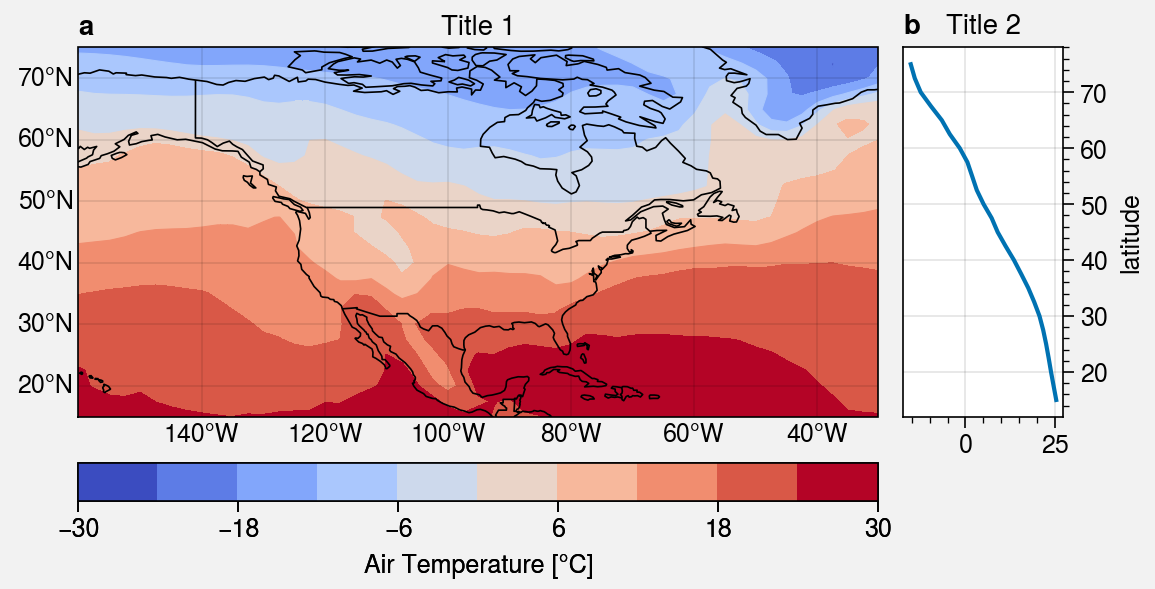

In [98]:
fig, axs = plot.subplots(nrows=1, ncols=2, proj=('cyl', None), wratios=(5, 1), axwidth=4)

# First axis
ax = axs[0]
m = ax.contourf(da, cmap='CoolWarm', symmetric=True)
ax.colorbar(m, label='Air Temperature [°C]', loc='b')

ax.format(
    coast=True, labels=True, borders=True,
    latlim=(da.lat.min().values, da.lat.max().values), 
    lonlim=(da.lon.min().values, da.lon.max().values),
    lonlines=20, latlines=10,
    title='Title 1'
)

# Second axis
ax = axs[1]
ax.plot(da.mean('lon'), da.lat)
ax.format(
    title='Title 2', xlabel='°C', ylabel='latitude', ytickloc='right', yticklabelloc='right'
)

# Format all axs
axs.format(abc=True)

fig.save('panel_1.jpg', dpi=300)

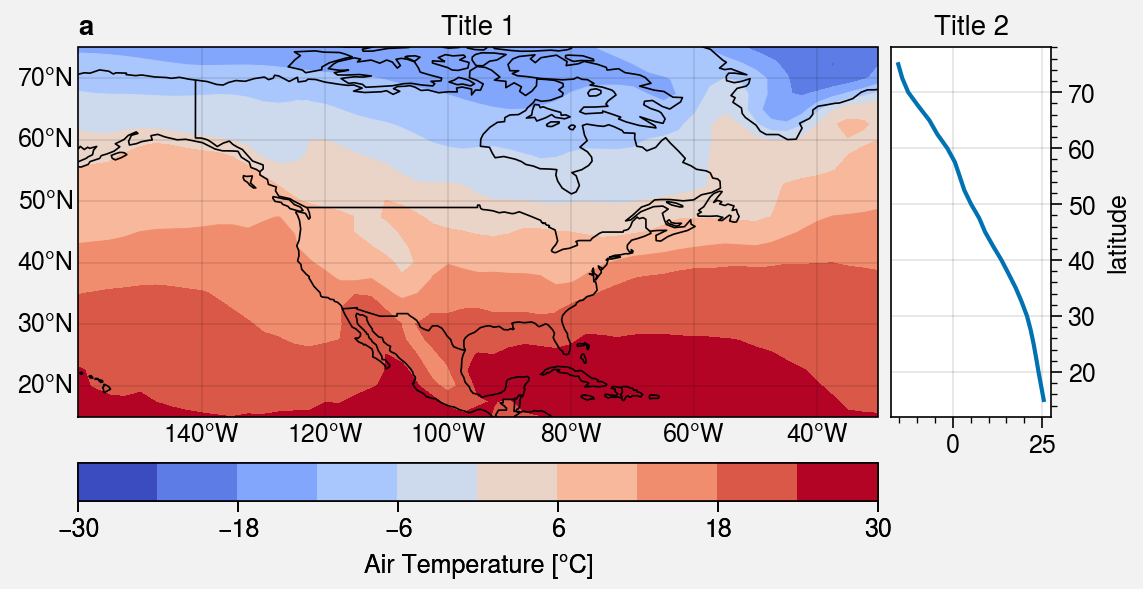

In [96]:
fig, axs = plot.subplots(nrows=1, ncols=1, proj='cyl', includepanels=True, axwidth=4)

# Plot
ax = axs[0]
ax.contourf(da, cmap='CoolWarm', symmetric=True, colorbar='b', colorbar_kw={'label': 'Air Temperature [°C]'} )

ax.format(
    coast=True, labels=True, borders=True,
    latlim=(da.lat.min().values, da.lat.max().values), 
    lonlim=(da.lon.min().values, da.lon.max().values),
    lonlines=20, latlines=10,
    title='Title 1'
)

# Panel
pax = ax.panel('r', width=0.8)
pax.plot(da.mean('lon'), da.lat)
pax.format(ylabel='latitude', title='Title 2')


# Format all axs
axs.format(abc=True)

fig.save('panel_2.jpg', dpi=300)